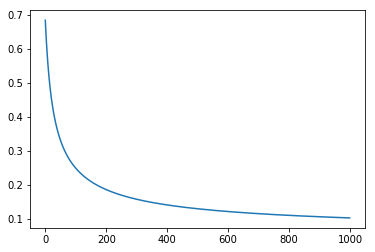

0.9824561403508771
1.0
0.9722222222222222


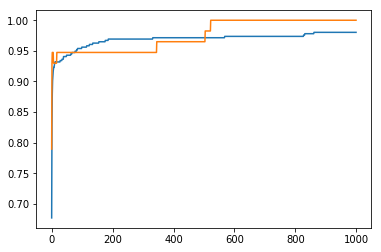

In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split 
from sklearn.preprocessing import Normalizer ,StandardScaler
from sklearn.linear_model import LinearRegression as lm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, recall_score, precision_score 

# STEP 1: Read CSV file using pandas
data = pd.read_csv(r'C:\Users\Deepali\Desktop\wdbc.csv', header=None)

#Process data file
 
# STEP 2: Drop Column Id
data = data.drop(data.columns[0], axis=1)

# STEP 3: Map label column to 0 and 1
 
findL = ['M', 'B']  # M -> Malligent, B->Benign
replaceL = [0,1]
data[1] = data[1].replace(findL, replaceL)

 
#slicing the dataframe(data) into X and Y(solution)
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]


# STEP 4: Split dataframe(data) into train, validate and test
x_train, x_vt_set, y_train, y_vt_set = train_test_split(X, Y, test_size=0.20, random_state=30)
x_test, x_validate, y_test, y_validate = train_test_split(x_vt_set, y_vt_set, test_size=0.50)

#Alterning the shape for satisfying matrix multiplication condition
y_train = y_train.values
y_train = y_train.reshape(1, y_train.shape[0])

 # STEP 5: Normalization
#Normalization of Training data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = x_train.T 

#Normalization of Testing data
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
x_test = x_test.T

y_test = y_test.values
y_test = y_test.reshape(1, y_test.shape[0])
 
#Normalization of Validating data
scaler = StandardScaler()
x_validate = scaler.fit_transform(x_validate)
x_validate = x_validate.T

y_validate = y_validate.values
y_validate = y_validate.reshape(1, y_validate.shape[0])

#Function code - Training Data
X, Y = x_train, y_train 

epochs = 1000 
learningrate = 0.01 
def sigmoid(z): 
    return 1 / (1 + np.exp(-z)) 
losstrack = []
accuracy_score_log_train = []
accuracy_score_log_validate = []
 
m = X.shape[1] 

w = np.random.randn(X.shape[0], 1)*0.01

b = 0 

for epoch in range(epochs): 
    
    z = np.dot(w.T, X) + b 
    p = sigmoid(z) 
    
    z1 = np.dot(w.T, x_validate) + b 
    p1 = sigmoid(z1)  

    #Calculating cost function 
    cost = -np.sum(np.multiply(np.log(p), Y) + np.multiply((1 - Y), np.log(1 - p)))/m 
    
    #calculating loss function
    losstrack.append(np.squeeze(cost)) 
    dz = p-Y 
    
    p[p>=0.5]=1
    p[p<0.5]=0  
    #p=int(p)
    
    accuracy_score_train = accuracy_score(Y[0], p[0])
    accuracy_score_log_train.append(accuracy_score_train)   
    
    p1[p1>=0.5]=1
    p1[p1<0.5]=0
    #p1=int(p1)
    

    accuracy_score_validate = accuracy_score(y_validate[0], p1[0])
    accuracy_score_log_validate.append(accuracy_score_validate)

    
    dw = (1 / m) * np.dot(X, dz.T) 
    db = (1 / m) * np.sum(dz) 
    w = w - learningrate * dw 
    b = b - learningrate * db
    
plt.plot(losstrack)
plt.show() 
plt.plot(accuracy_score_log_train)
plt.plot(accuracy_score_log_validate)

z2 = np.dot(w.T, x_test) + b 
p2 = sigmoid(z2)

p2[p2>=0.5]=1
p2[p2<0.5]=0

#Calculating accuracy, recall and precision
accuracy_score_test = accuracy_score(y_test[0], p2[0])  
recall_score_test = recall_score(y_test[0], p2[0])
precision_score_test = precision_score(y_test[0], p2[0])

print(accuracy_score_test)
print(recall_score_test)
print(precision_score_test)
 



#Y = np.argmax(Y, axis=1)
#accuracy score





